In [1330]:
# Jul 23, 2023 - Attempt 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('https://github.com/kimichenn/nord-deep-mpl-stylesheet/raw/main/nord-deep.mplstyle')

In [1331]:
df = pd.read_csv("./data/train.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Splitting data


In [1332]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]


In [1333]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## EDA

In [1334]:
df.shape


(1460, 81)

In [1335]:
X_train.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overal

In [1336]:
X_train.isna().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       217
LotArea             0
Street              0
Alley            1094
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          6
MasVnrArea          6
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           28
BsmtCond           28
BsmtExposure       28
BsmtFinType1       28
BsmtFinSF1          0
BsmtFinType2       28
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

C:\Users\kimi\AppData\Local\Temp\ipykernel_27804\3927732488.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.corr()


<Axes: >

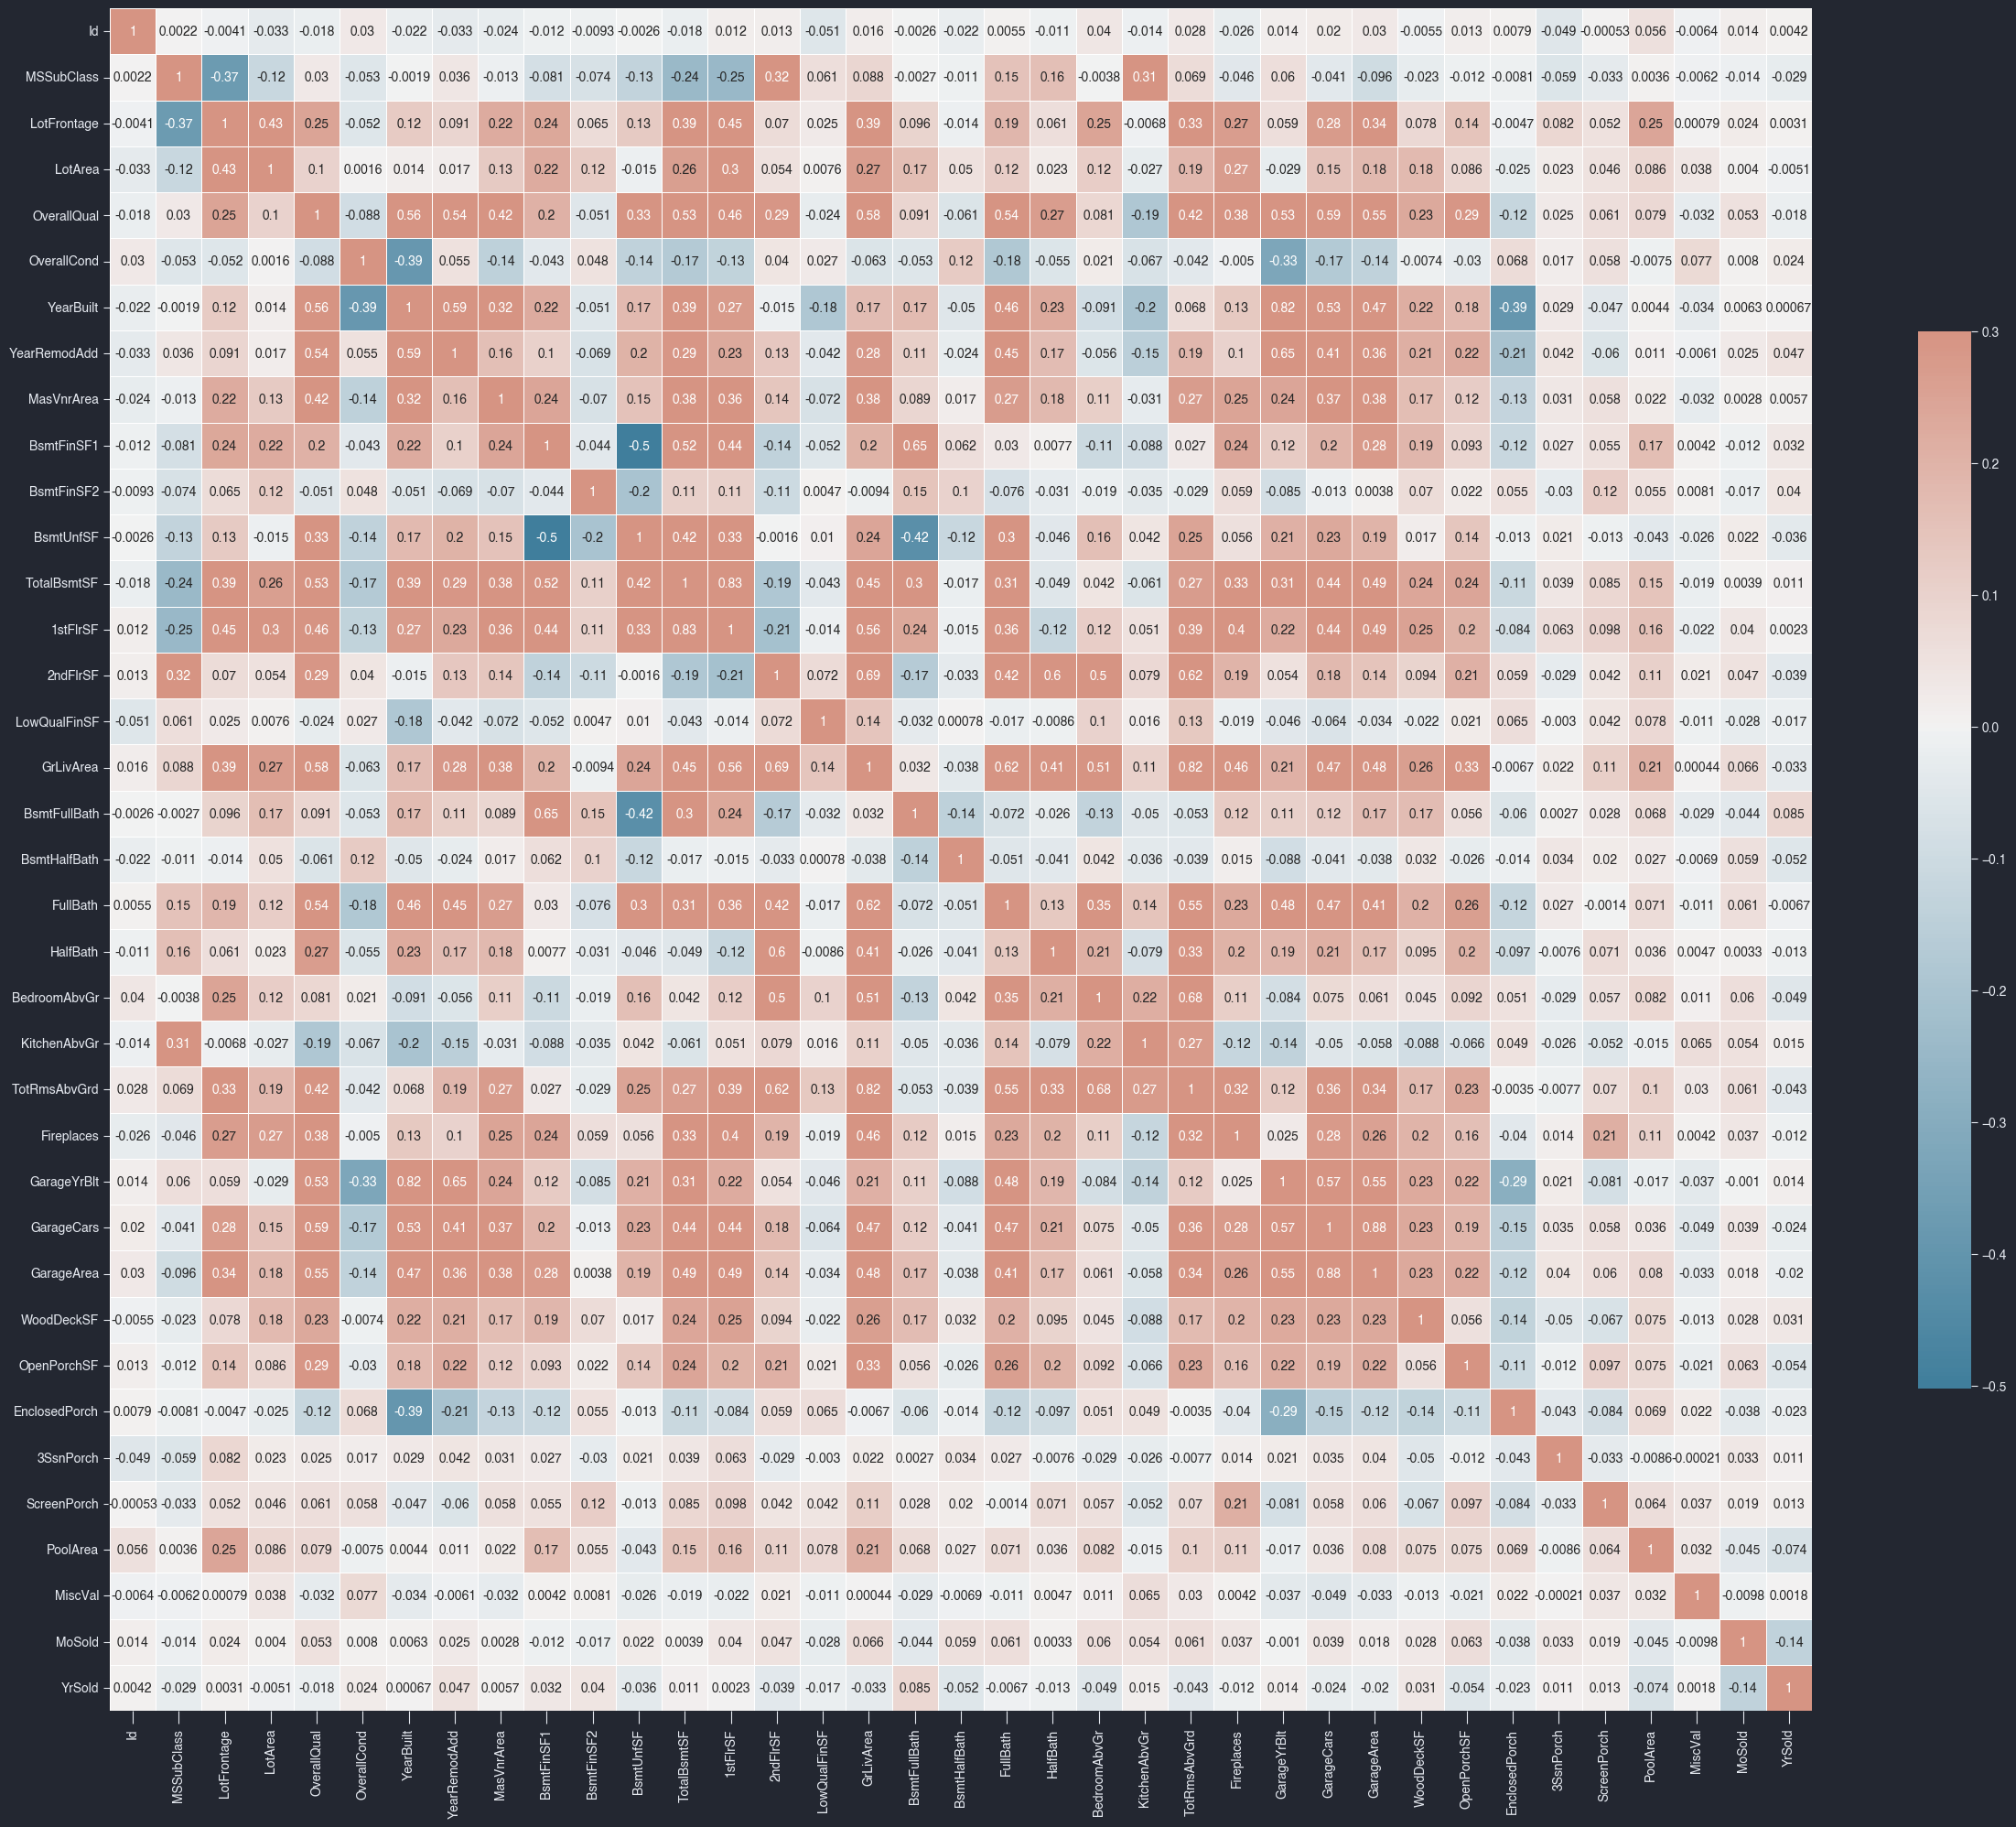

In [1337]:
corr = X_train.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [1338]:
def na_cols():
	return X_train.isna().sum().loc[X_train.isna().sum() != 0]

In [1339]:
na_cols()

LotFrontage      217
Alley           1094
MasVnrType         6
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64

### Addressing Lot Frontage NaN


In [1340]:
X_train["LotFrontage"].head()


254     70.0
1066    59.0
638     67.0
799     60.0
380     50.0
Name: LotFrontage, dtype: float64

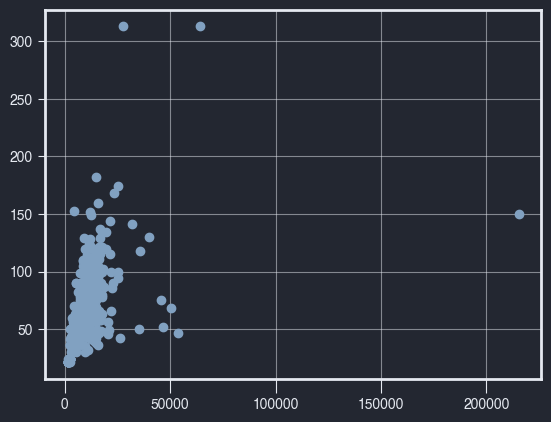

In [1341]:
fig, ax = plt.subplots()
ax.scatter(X_train["LotArea"], X_train["LotFrontage"])

In [1342]:
# filter outliers
lot_filt = X_train.loc[(X_train["LotFrontage"] > 300) | (X_train["LotArea"] > 200000)].index
lot_filt

Int64Index([1298, 934, 313], dtype='int64')

In [1343]:
X_train.drop(lot_filt, inplace=True)
y_train.drop(lot_filt, inplace=True)

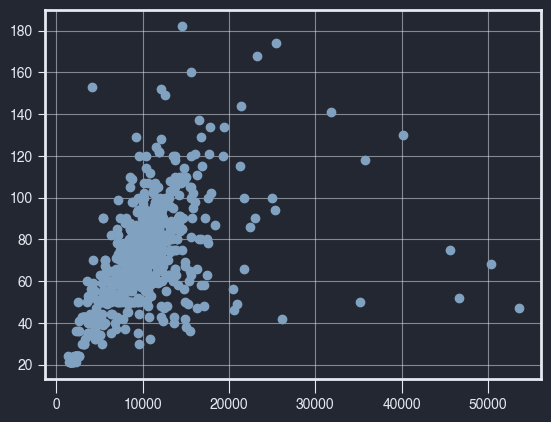

In [1344]:
fig, ax = plt.subplots()
ax.scatter(X_train["LotArea"], X_train["LotFrontage"])

#### Find a LinReg between LotArea and LotFrontage


In [1345]:
df_train_lot = X_train[["LotArea", "LotFrontage"]].copy(deep=True)
df_train_lot.dropna(inplace=True)
df_train_lot.shape, X_train.shape


((948, 2), (1165, 80))

In [1346]:
X_train_lot = df_train_lot["LotArea"].values.reshape(-1, 1)
y_train_lot = df_train_lot["LotFrontage"].values.reshape(-1, 1)

In [1347]:
from sklearn.linear_model import LinearRegression
lot_reg = LinearRegression()
lot_reg.fit(X_train_lot, y_train_lot)
lot_reg.score(X_train_lot, y_train_lot)


0.26119104845296925

In [1348]:
lot_reg.coef_, lot_reg.intercept_


(array([[0.00239251]]), array([46.49737952]))

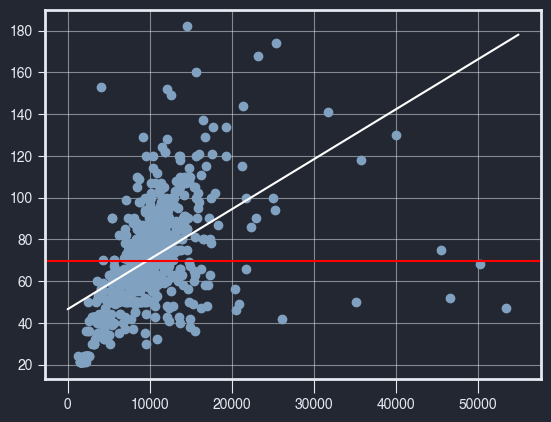

In [1349]:
fig, ax = plt.subplots()
ax.scatter(X_train_lot, y_train_lot)
x_seq = np.linspace(0, 55000, 100)
ax.plot(x_seq, lot_reg.intercept_ + (lot_reg.coef_ * x_seq).T, color="white")
ax.axhline(y_train_lot.mean(), color="red")


#### Actually filling LotFrontage


In [1350]:
lot_front_na = X_train.loc[X_train["LotFrontage"].isna() == True]["LotArea"].values.reshape(-1, 1)
lot_front_pred = lot_reg.predict(lot_front_na).flatten()
lot_front_pred_dict = {}
for i, j in enumerate(X_train.loc[X_train["LotFrontage"].isna() == True].index):
	lot_front_pred_dict[j] = lot_front_pred[i]
X_train["LotFrontage"].fillna(lot_front_pred_dict, inplace=True)

In [1351]:
na_cols()

Alley           1091
MasVnrType         6
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1160
Fence            932
MiscFeature     1119
dtype: int64

### Addressing Alley NaN


In [1352]:
X_train["Alley"].unique()


array([nan, 'Pave', 'Grvl'], dtype=object)

In [1353]:
X_train["Alley"].fillna("None", inplace=True)

In [1354]:
na_cols()

MasVnrType         6
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1160
Fence            932
MiscFeature     1119
dtype: int64

### Addressing MasVnrType NaN


In [1355]:
df_mas_tmp = X_train.copy(deep=True)[["MasVnrType", "MasVnrArea", "ExterQual", "ExterCond", "Exterior1st", "Exterior2nd"]].dropna()
df_mas_tmp.head()

,MasVnrType,MasVnrArea,ExterQual,ExterCond,Exterior1st,Exterior2nd
254,None,0.0,TA,Gd,MetalSd,MetalSd
1066,None,0.0,Gd,TA,VinylSd,VinylSd
638,None,0.0,TA,TA,MetalSd,Wd Sdng
799,BrkFace,252.0,TA,TA,Wd Sdng,Wd Sdng
380,None,0.0,TA,TA,BrkFace,Wd Sdng


In [1356]:
# Predict MasVnrType with ML cuz im too dumb to draw categorical correlations with continuous variables
from sklearn.model_selection import train_test_split

X_mas_tmp = df_mas_tmp.drop("MasVnrType", axis=1)
y_mas_tmp = df_mas_tmp["MasVnrType"]

exterqual_dummies = pd.get_dummies(X_mas_tmp["ExterQual"], prefix="ExterQual")
extercond_dummies = pd.get_dummies(X_mas_tmp["ExterCond"], prefix="ExterCond")
exterior1st_dummies = pd.get_dummies(X_mas_tmp["Exterior1st"], prefix="Exterior1st")
exterior2nd_dummies = pd.get_dummies(X_mas_tmp["Exterior2nd"], prefix="Exterior2nd")

X_mas_tmp = pd.concat([exterqual_dummies, extercond_dummies, exterior1st_dummies, exterior2nd_dummies], axis=1)

X_masvnrtype_train, X_masvnrtype_test, y_masvnrtype_train, y_masvnrtype_test = train_test_split(X_mas_tmp, y_mas_tmp, test_size=0.2)


In [1357]:
from sklearn.ensemble import RandomForestClassifier

# Test to find the best hyperparameters
res_log = {}
for i in range(1, 25):
	masvnrtype_model = RandomForestClassifier(max_depth=i, n_jobs=-1)
	masvnrtype_model.fit(X_masvnrtype_train, y_masvnrtype_train)
	model_score = masvnrtype_model.score(X_masvnrtype_test, y_masvnrtype_test)
	res_log[i] = model_score

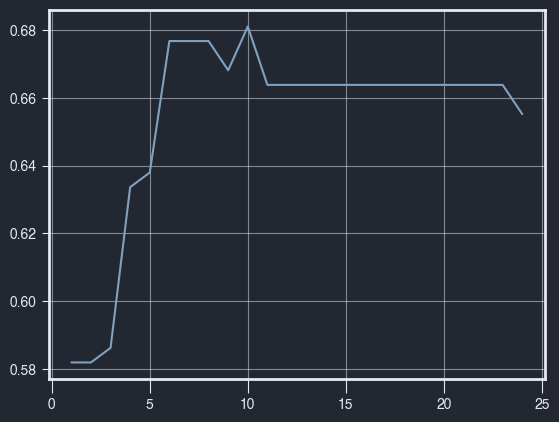

In [1358]:
fig, ax = plt.subplots()
ax.plot(res_log.keys(), res_log.values())

In [1359]:
max(res_log, key=res_log.get)

10

In [1360]:
# Fitting the model at optimal hyperparameter
masvnrtype_model = RandomForestClassifier(max_depth=10, n_jobs=-1)
masvnrtype_model.fit(X_masvnrtype_train, y_masvnrtype_train)
model_score = masvnrtype_model.score(X_masvnrtype_test, y_masvnrtype_test)


In [1361]:
model_score

0.6637931034482759

In [1362]:
# Now we take the actual NaN data and fit
masvnrtype_na = X_train.loc[X_train["MasVnrType"].isna() == True][["ExterQual", "ExterCond", "Exterior1st", "Exterior2nd"]]

masvnrtype_na_exterqual_dummies = pd.get_dummies(X_train["ExterQual"], prefix="ExterQual")
masvnrtype_na_extercond_dummies = pd.get_dummies(X_train["ExterCond"], prefix="ExterCond")
masvnrtype_na_exterior1st_dummies = pd.get_dummies(X_train["Exterior1st"], prefix="Exterior1st")
masvnrtype_na_exterior2nd_dummies = pd.get_dummies(X_train["Exterior2nd"], prefix="Exterior2nd")

masvnrtype_na_f = pd.concat([masvnrtype_na_exterqual_dummies, masvnrtype_na_extercond_dummies, masvnrtype_na_exterior1st_dummies,
					   masvnrtype_na_exterior2nd_dummies], axis=1)
masvnrtype_pred = masvnrtype_model.predict(masvnrtype_na_f).flatten()
masvnrtype_pred_dict = {}
for i, j in enumerate(X_train.loc[X_train["MasVnrType"].isna() == True].index):
	masvnrtype_pred_dict[j] = masvnrtype_pred[i]
X_train["MasVnrType"].fillna(masvnrtype_pred_dict, inplace=True)
masvnrtype_pred_dict

{936: 'None',
 973: 'BrkFace',
 650: 'None',
 1278: 'None',
 234: 'None',
 977: 'None'}

### Addressing MasVnrArea NaN

In [1363]:
X_mas_tmp = df_mas_tmp.drop("MasVnrArea", axis=1)
y_mas_tmp = df_mas_tmp["MasVnrArea"]

exterqual_dummies = pd.get_dummies(X_mas_tmp["ExterQual"], prefix="ExterQual")
extercond_dummies = pd.get_dummies(X_mas_tmp["ExterCond"], prefix="ExterCond")
exterior1st_dummies = pd.get_dummies(X_mas_tmp["Exterior1st"], prefix="Exterior1st")
exterior2nd_dummies = pd.get_dummies(X_mas_tmp["Exterior2nd"], prefix="Exterior2nd")

X_mas_tmp = pd.concat([exterqual_dummies, extercond_dummies, exterior1st_dummies, exterior2nd_dummies], axis=1)

X_masvnrarea_train, X_masvnrarea_test, y_masvnrarea_train, y_masvnrarea_test = train_test_split(X_mas_tmp, y_mas_tmp, test_size=0.2)

In [1364]:
from sklearn.linear_model import ElasticNet

# Test to find the best hyperparameters
res_log = {}
for i in range(1, 200):
	masvnrarea_model = ElasticNet(alpha=i/100)
	masvnrarea_model.fit(X_masvnrarea_train, y_masvnrarea_train)
	model_score = masvnrarea_model.score(X_masvnrarea_test, y_masvnrarea_test)
	res_log[i] = model_score

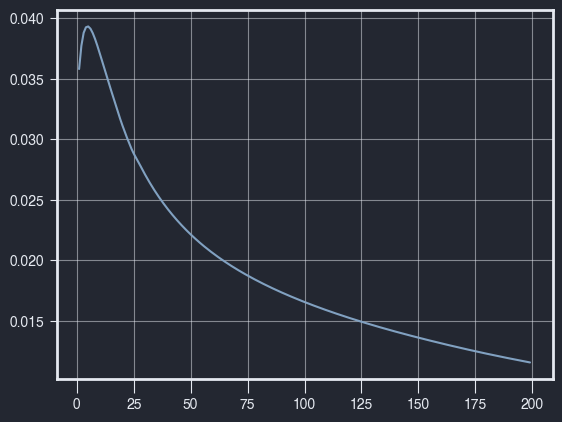

In [1365]:
fig, ax = plt.subplots()
ax.plot(res_log.keys(), res_log.values())

In [1366]:
max(res_log, key=res_log.get)

5

Turns out that there are no good models for this; will just fill with either mean, median, or mode instead

MasVnrArea is 0 if MasVnrType is None, and there according to the prediction from the MasVnrType model, there is only one that is NOT none.

In [1367]:
tmp_masvnrarea = X_train["MasVnrArea"].copy(deep=True).dropna()
tmp_masvnrarea = tmp_masvnrarea.loc[tmp_masvnrarea != 0]
tmp_masvnrarea.describe()

count     487.000000
mean      245.969199
std       187.994202
min         1.000000
25%       108.000000
50%       200.000000
75%       320.000000
max      1378.000000
Name: MasVnrArea, dtype: float64

In [1368]:
tmp_masvnrarea.mode()[1]

180.0

In [1369]:
tmp_masvnrarea.value_counts().head()

180.0    7
108.0    7
106.0    6
72.0     6
16.0     6
Name: MasVnrArea, dtype: int64

In [1370]:
tmp_masvnrarea.median()

200.0

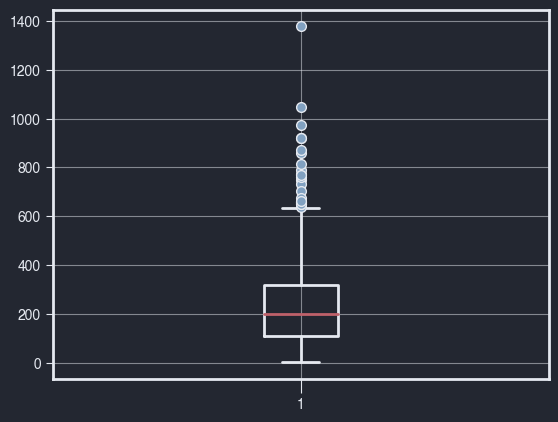

In [1371]:
fig, ax = plt.subplots()
ax.boxplot(tmp_masvnrarea);

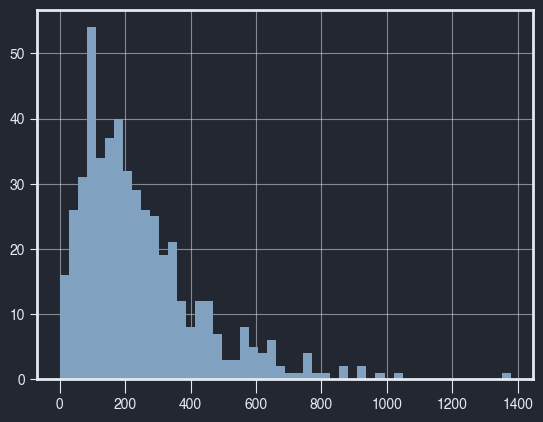

In [1372]:
fig, ax = plt.subplots()
ax.hist(tmp_masvnrarea, bins=50);

In [1373]:
q1 = tmp_masvnrarea.quantile(0.25)
q3 = tmp_masvnrarea.quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
tmp2_masvnrarea = tmp_masvnrarea.loc[(tmp_masvnrarea > fence_low) & (tmp_masvnrarea < fence_high)]
len(tmp2_masvnrarea), len(tmp_masvnrarea)

(464, 487)

In [1374]:
tmp2_masvnrarea.mean()

218.69396551724137

Will use median since the data is kinda skewed for mean and the range isn't significantly large enough to justify its usage

In [1375]:
X_train["MasVnrArea"] = X_train["MasVnrArea"].fillna(X_train["MasVnrArea"].median())

In [1376]:
X_train.isna().sum().loc[X_train.isna().sum() != 0]

BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1160
Fence            932
MiscFeature     1119
dtype: int64

In [1377]:
na_cols()

BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1160
Fence            932
MiscFeature     1119
dtype: int64

### Addressing Bsmt NaN

In [1378]:
df_bsmt = X_train.copy(deep=True)[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]]

In [1379]:
df_bsmt.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
254,TA,TA,No,Rec,922,Unf,0,392,1314
1066,Gd,TA,No,Unf,0,Unf,0,799,799
638,Fa,TA,No,Unf,0,Unf,0,796,796
799,Gd,TA,No,ALQ,569,Unf,0,162,731
380,TA,TA,No,LwQ,218,Unf,0,808,1026


In [1380]:
df_bsmt_nulls = df_bsmt[df_bsmt.isnull().any(axis=1)]
df_bsmt_nulls

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
1048,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
778,NaN,NaN,NaN,NaN,0,NaN,0,0,0
705,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
553,NaN,NaN,NaN,NaN,0,NaN,0,0,0
1035,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0
533,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [1381]:
columns_to_fill = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
X_train[columns_to_fill] = X_train[columns_to_fill].fillna("None")

In [1382]:
na_cols()

Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1160
Fence            932
MiscFeature     1119
dtype: int64

### Addressing Electrical NaN

In [1383]:
X_train["Electrical"].value_counts()

SBrkr    1068
FuseA      69
FuseF      24
FuseP       3
Name: Electrical, dtype: int64

There is only one missing value to be replaced. With the majority of the exisiting values being `SBrkr`, it is pretty safe to guess that the missing value will be the same.

In [1384]:
X_train["Electrical"] = X_train["Electrical"].fillna("SBrkr")

In [1385]:
na_cols()

FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1160
Fence            932
MiscFeature     1119
dtype: int64

### Addressing FireplaceQu NaN

In [1386]:
df_fireplace = X_train[["FireplaceQu", "Fireplaces", "Functional", "Heating", "HeatingQC"]]
df_fireplace.head()

,FireplaceQu,Fireplaces,Functional,Heating,HeatingQC
254,NaN,0,Typ,GasA,TA
1066,TA,1,Typ,GasA,Gd
638,NaN,0,Typ,GasA,Gd
799,TA,2,Typ,GasA,Ex
380,Gd,1,Typ,GasA,TA


In [1387]:
df_fireplace["Heating"].value_counts()

GasA     1138
GasW       14
Grav        6
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [1388]:
df_fireplace["FireplaceQu"].value_counts()

Gd    302
TA    252
Fa     27
Ex     21
Po     16
Name: FireplaceQu, dtype: int64

0 fireplaces = NaN fireplace quality

In [1389]:
X_train['FireplaceQu'].fillna('None', inplace=True)

In [1390]:
na_cols()

GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1160
Fence            932
MiscFeature     1119
dtype: int64

### Addressing Garage NaN

Being smart and reading the documentation this time, NaN in these values mean that there are no garages. So we just have to double check that they're all missing values in the same rows

In [1391]:
X_train.loc[X_train[["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]].isna().any(axis=1)][["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
638,NaN,NaN,NaN,NaN,NaN
210,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN
1030,NaN,NaN,NaN,NaN,NaN
1137,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN
1323,NaN,NaN,NaN,NaN,NaN
291,NaN,NaN,NaN,NaN,NaN


In [1392]:
X_train.loc[:, ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]] = X_train.loc[:, ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]].fillna("None")

In [1393]:
na_cols()

PoolQC         1160
Fence           932
MiscFeature    1119
dtype: int64

### Addressing PoolQC NaN

Reading through the documentation again, NaN means that there are no pools

In [1394]:
X_train["PoolQC"].fillna("None", inplace=True)

In [1395]:
na_cols()

Fence           932
MiscFeature    1119
dtype: int64

### Addressing Fence NaN

NA means no fence

In [1396]:
X_train["Fence"].fillna("None", inplace=True)

In [1397]:
na_cols()

MiscFeature    1119
dtype: int64

### Addressing MiscFeature NaN

instead of looking at NaNs, we'll look at the ones with values to possibly extract data from it.

In [1398]:
df_misc = X_train.copy(deep=True)[["MiscFeature", "MiscVal"]]
df_misc.loc[df_misc["MiscFeature"].isna() == False]

,MiscFeature,MiscVal
873,Othr,0
1200,Shed,0
346,Gar2,15500
626,Shed,600
813,Shed,500
439,Shed,800
1210,Shed,400
705,Othr,3500
5,Shed,700
767,Shed,1300


MiscValue is more important than MiscFeature, so we'll just keep MiscValue as the "additional value for the house" and drop MiscFeature

In [1399]:
X_train.drop("MiscFeature", axis=1, inplace=True)

In [1400]:
na_cols()

Series([], dtype: int64)

### Cleaning Up

In [1401]:
X_train.drop("Id", axis=1, inplace=True)

In [1402]:
cat_cols = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities",
                    "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType",
                    "HouseStyle", "OverallQual", "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st",
                    "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual",
                    "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC",
                    "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType",
                    "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "SaleType",
                    "SaleCondition"]

In [1403]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Apply the encoder to the DataFrame
X_train_encoded = encoder.fit_transform(X_train[cat_cols])

# The result is a NumPy array, you may want to convert it back into a DataFrame:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(cat_cols))

c:\Users\kimi\anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1404]:
len(X_train_encoded_df.columns)

292

## Transforming the test set to match the training set

In [1405]:
# Filling Lot NaN
lot_front_na = X_test.loc[X_test["LotFrontage"].isna() == True]["LotArea"].values.reshape(-1, 1)
lot_front_pred = lot_reg.predict(lot_front_na).flatten()
lot_front_pred_dict = {}
for i, j in enumerate(X_test.loc[X_test["LotFrontage"].isna() == True].index):
	lot_front_pred_dict[j] = lot_front_pred[i]
X_test["LotFrontage"].fillna(lot_front_pred_dict, inplace=True)

In [1406]:
# Filling Alley NaN
X_test["Alley"].fillna("None", inplace=True)


In [1407]:
# Filling MasVnrType NaN

train_dummies = pd.get_dummies(X_train[["ExterQual", "ExterCond", "Exterior1st", "Exterior2nd"]])
test_masvnrtype_na = X_test.loc[X_test["MasVnrType"].isna() == True][["ExterQual", "ExterCond", "Exterior1st", "Exterior2nd"]]
test_dummies = pd.get_dummies(test_masvnrtype_na, prefix=["ExterQual", "ExterCond", "Exterior1st", "Exterior2nd"])
test_dummies = test_dummies.reindex(columns = train_dummies.columns, fill_value=0)
test_masvnrtype_pred = masvnrtype_model.predict(test_dummies).flatten()


test_masvnrtype_pred_dict = {}
for i, j in enumerate(X_test.loc[X_test["MasVnrType"].isna() == True].index):
	test_masvnrtype_pred_dict[j] = test_masvnrtype_pred[i]
X_test["MasVnrType"].fillna(test_masvnrtype_pred_dict, inplace=True)
test_masvnrtype_pred_dict

{529: 'None', 1243: 'Stone'}

In [1408]:
# Filling MasVnrArea NaN
X_test["MasVnrArea"] = X_test["MasVnrArea"].fillna(X_test["MasVnrArea"].median())

In [1409]:
# Filling Bsmt NaN
columns_to_fill = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
X_test[columns_to_fill] = X_test[columns_to_fill].fillna("None")

In [1410]:
# Filling Electrical NaN
X_test["Electrical"] = X_test["Electrical"].fillna("SBrkr")

In [1411]:
# FIlling FireplaceQu NaN
X_test['FireplaceQu'].fillna('None', inplace=True)

In [1412]:
# Filling Garage NaN
X_test.loc[X_test[["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]].isna().any(axis=1)][["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]]
X_test.loc[:, ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]] = X_test.loc[:, ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]].fillna("None")

In [1413]:
# Filling PoolQC NaN
X_test["PoolQC"].fillna("None", inplace=True)

In [1414]:
# Filling Fence NaN
X_test["Fence"].fillna("None", inplace=True)

In [1415]:
# Filling MiscFeature NaN
X_test.drop("MiscFeature", axis=1, inplace=True)

In [1416]:
# Dropping Id for obvious reasons
X_test.drop("Id", axis=1, inplace=True)

In [1417]:
# Apply the encoder to the DataFrame
X_test_encoded = encoder.transform(X_test[cat_cols])

# The result is a NumPy array, you may want to convert it back into a DataFrame:
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(cat_cols))

In [1418]:
from sklearn.ensemble import RandomForestRegressor

score_log = {}
for i in range(1, 50):
	model = RandomForestRegressor(n_estimators=500, max_depth=i, random_state=42, n_jobs=-1, verbose=True)
	model.fit(X_train_encoded_df, y_train)
	model_score = model.score(X_test_encoded_df, y_test)
	score_log[i] = model_score
	


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s


[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | 

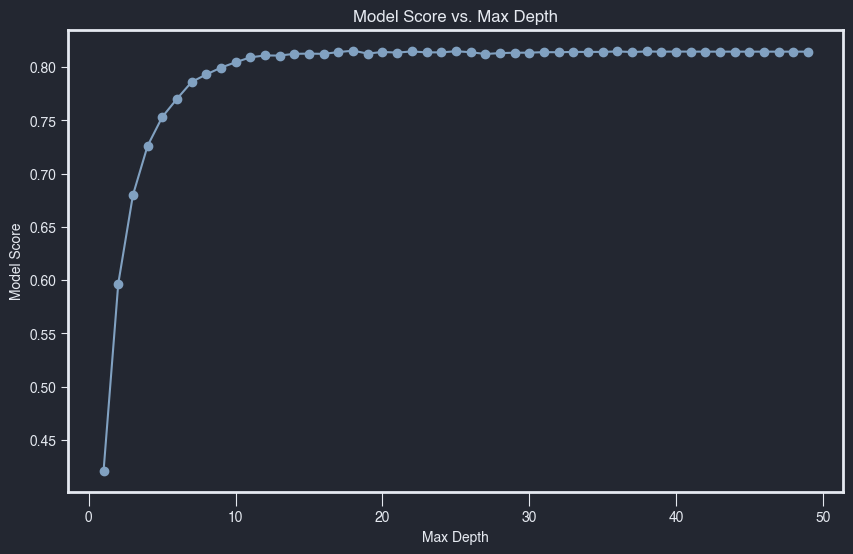

In [1419]:
# Creating a list of depths and their corresponding scores
depths = list(score_log.keys())
scores = list(score_log.values())

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(depths, scores, marker='o')
plt.title('Model Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Model Score')
plt.grid()

plt.show()


In [1420]:
model = RandomForestRegressor(n_estimators=500, max_depth=11, random_state=42, n_jobs=-1)
model.fit(X_train_encoded_df, y_train)
model_score = model.score(X_test_encoded_df, y_test)
model_score

0.8091990117770771

## Use the real test set!

In [1427]:
df_test = pd.read_csv("./data/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1430]:
X_test_f = df_test.copy(deep=True)

lot_front_na = X_test_f.loc[X_test_f["LotFrontage"].isna() == True]["LotArea"].values.reshape(-1, 1)
lot_front_pred = lot_reg.predict(lot_front_na).flatten()
lot_front_pred_dict = {}
for i, j in enumerate(X_test_f.loc[X_test_f["LotFrontage"].isna() == True].index):
	lot_front_pred_dict[j] = lot_front_pred[i]
X_test_f["LotFrontage"].fillna(lot_front_pred_dict, inplace=True)

X_test_f["Alley"].fillna("None", inplace=True)

train_dummies = pd.get_dummies(X_train[["ExterQual", "ExterCond", "Exterior1st", "Exterior2nd"]])
test_masvnrtype_na = X_test_f.loc[X_test_f["MasVnrType"].isna() == True][["ExterQual", "ExterCond", "Exterior1st", "Exterior2nd"]]
test_dummies = pd.get_dummies(test_masvnrtype_na, prefix=["ExterQual", "ExterCond", "Exterior1st", "Exterior2nd"])
test_dummies = test_dummies.reindex(columns = train_dummies.columns, fill_value=0)
test_masvnrtype_pred = masvnrtype_model.predict(test_dummies).flatten()


test_masvnrtype_pred_dict = {}
for i, j in enumerate(X_test_f.loc[X_test_f["MasVnrType"].isna() == True].index):
	test_masvnrtype_pred_dict[j] = test_masvnrtype_pred[i]
X_test_f["MasVnrType"].fillna(test_masvnrtype_pred_dict, inplace=True)

X_test_f["MasVnrArea"] = X_test_f["MasVnrArea"].fillna(X_test_f["MasVnrArea"].median())

columns_to_fill = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
X_test_f[columns_to_fill] = X_test_f[columns_to_fill].fillna("None")

X_test_f["Electrical"] = X_test_f["Electrical"].fillna("SBrkr")

X_test_f['FireplaceQu'].fillna('None', inplace=True)

X_test_f.loc[X_test_f[["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]].isna().any(axis=1)][["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]]
X_test_f.loc[:, ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]] = X_test_f.loc[:, ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]].fillna("None")

X_test_f["PoolQC"].fillna("None", inplace=True)

X_test_f["Fence"].fillna("None", inplace=True)

X_test_f.drop("MiscFeature", axis=1, inplace=True)

X_test_f.drop("Id", axis=1, inplace=True)

X_test_encoded = encoder.transform(X_test_f[cat_cols])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(cat_cols))

In [1436]:
final_pred = model.predict(X_test_encoded_df)
final_pred

array([130945.65202203, 144029.5628165 , 179329.18995556, ...,
       148666.10976175, 130497.30131281, 196067.29950943])

In [1439]:
final_pred_ser = pd.Series(final_pred)
final_pred_df = pd.concat([df_test["Id"], final_pred_ser.rename("SalePrice")], axis=1)
final_pred_df.head()

,Id,SalePrice
0,1461,130945.652022
1,1462,144029.562816
2,1463,179329.189956
3,1464,196645.900865
4,1465,209415.822829


In [1440]:
final_pred_df.to_csv("submission.csv" ,index=False)